In [1]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_classif as MIC
from collections import Counter
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [2]:
#dataset
df = pd.read_csv("C:\\Users\\M HARSHITHA\\OneDrive\\Desktop\\DoS WSN\\WSN-DS.csv\\WSN-DS.csv")

In [3]:
df.head(10) # prints first 5 rows

,id,Time,Is_CH,who CH,Dist_To_CH,ADV_S,ADV_R,JOIN_S,JOIN_R,SCH_S,SCH_R,Rank,DATA_S,DATA_R,Data_Sent_To_BS,dist_CH_To_BS,send_code,Expaned Energy,Attack type
0,101000,50,1,101000,0.00000,1,0,0,25,1,0,0,0,1200,48,130.08535,0,2.46940,Normal
1,101001,50,0,101044,75.32345,0,4,1,0,0,1,2,38,0,0,0.00000,4,0.06957,Normal
2,101002,50,0,101010,46.95453,0,4,1,0,0,1,19,41,0,0,0.00000,3,0.06898,Normal
3,101003,50,0,101044,64.85231,0,4,1,0,0,1,16,38,0,0,0.00000,4,0.06673,Normal
4,101004,50,0,101010,4.83341,0,4,1,0,0,1,25,41,0,0,0.00000,3,0.06534,Normal
5,101005,50,0,101010,31.91198,0,4,1,0,0,1,18,41,0,0,0.00000,3,0.06717,Normal
6,101006,50,0,101044,24.34167,0,4,1,0,0,1,5,38,0,0,0.00000,4,0.06214,Normal
7,101007,50,0,101010,26.75033,0,4,1,0,0,1,21,41,0,0,0.00000,3,0.06662,Normal
8,101008,50,0,101044,63.66485,0,4,1,0,0,1,17,38,0,0,0.00000,4,0.06649,Normal
9,101009,50,0,101000,32.90217,0,4,1,0,0,1,12,48,0,0,0.00000,1,0.07903,Normal


In [4]:
df.info() # count, datatype of all columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374661 entries, 0 to 374660
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0    id               374661 non-null  int64  
 1    Time             374661 non-null  int64  
 2    Is_CH            374661 non-null  int64  
 3    who CH           374661 non-null  int64  
 4    Dist_To_CH       374661 non-null  float64
 5    ADV_S            374661 non-null  int64  
 6    ADV_R            374661 non-null  int64  
 7    JOIN_S           374661 non-null  int64  
 8    JOIN_R           374661 non-null  int64  
 9    SCH_S            374661 non-null  int64  
 10   SCH_R            374661 non-null  int64  
 11  Rank              374661 non-null  int64  
 12   DATA_S           374661 non-null  int64  
 13   DATA_R           374661 non-null  int64  
 14   Data_Sent_To_BS  374661 non-null  int64  
 15   dist_CH_To_BS    374661 non-null  float64
 16   send_code        37

In [5]:
df.shape #number of rows, columns

(374661, 19)

In [6]:
df.groupby('Attack type').size() # group by class label

Attack type
Blackhole     10049
Flooding       3312
Grayhole      14596
Normal       340066
TDMA           6638
dtype: int64

# DATA CLEANING

In [7]:
# Converting "Attack type" categorical data into numerical datatype
# blackhole-0
# flooding -1
# grayhole -2
# normal   -3
# TDMA     -4
ord_enc = OrdinalEncoder(dtype=int)
df["AttackType_new"] = ord_enc.fit_transform(df[["Attack type"]])
df[["Attack type","AttackType_new"]]

,Attack type,AttackType_new
0,Normal,3
1,Normal,3
2,Normal,3
3,Normal,3
4,Normal,3
...,...,...
374656,Normal,3
374657,Normal,3
374658,Normal,3
374659,Normal,3


In [8]:
# checking for attack type and numerical value matching
print(df[df['AttackType_new'] == 0].head(1))  # blackhole
print(df[df['AttackType_new'] == 1].head(1))  # flooding
print(df[df['AttackType_new'] == 2].head(1))  # grayhole
print(df[df['AttackType_new'] == 3].head(1))  # normal
print(df[df['AttackType_new'] == 4].head(1))  # TDMA

            id   Time   Is_CH   who CH   Dist_To_CH   ADV_S   ADV_R   JOIN_S  \
168913  102041    103       1   102041          0.0       1       3        0   

         JOIN_R   SCH_S   SCH_R  Rank   DATA_S   DATA_R   Data_Sent_To_BS  \
168913       93       1       0     0        0     1302                 0   

         dist_CH_To_BS   send_code   Expaned Energy Attack type  \
168913             0.0            0         0.00726   Blackhole   

        AttackType_new  
168913               0  
          id   Time   Is_CH   who CH   Dist_To_CH   ADV_S   ADV_R   JOIN_S  \
4593  101096     53       1   101096          0.0       7       0        0   

       JOIN_R   SCH_S   SCH_R  Rank   DATA_S   DATA_R   Data_Sent_To_BS  \
4593       90       1       0     0        0     1350                15   

       dist_CH_To_BS   send_code   Expaned Energy Attack type  AttackType_new  
4593       121.69498            0         2.25865    Flooding               1  
            id   Time   Is_CH  

In [9]:
# last column "Attack type"; now added another column "AttackType_new"
df.head()

,id,Time,Is_CH,who CH,Dist_To_CH,ADV_S,ADV_R,JOIN_S,JOIN_R,SCH_S,SCH_R,Rank,DATA_S,DATA_R,Data_Sent_To_BS,dist_CH_To_BS,send_code,Expaned Energy,Attack type,AttackType_new
0,101000,50,1,101000,0.00000,1,0,0,25,1,0,0,0,1200,48,130.08535,0,2.46940,Normal,3
1,101001,50,0,101044,75.32345,0,4,1,0,0,1,2,38,0,0,0.00000,4,0.06957,Normal,3
2,101002,50,0,101010,46.95453,0,4,1,0,0,1,19,41,0,0,0.00000,3,0.06898,Normal,3
3,101003,50,0,101044,64.85231,0,4,1,0,0,1,16,38,0,0,0.00000,4,0.06673,Normal,3
4,101004,50,0,101010,4.83341,0,4,1,0,0,1,25,41,0,0,0.00000,3,0.06534,Normal,3


In [10]:
#removing original "Attack type" column
df=df.drop(['Attack type'], axis=1)
df

,id,Time,Is_CH,who CH,Dist_To_CH,ADV_S,ADV_R,JOIN_S,JOIN_R,SCH_S,SCH_R,Rank,DATA_S,DATA_R,Data_Sent_To_BS,dist_CH_To_BS,send_code,Expaned Energy,AttackType_new
0,101000,50,1,101000,0.00000,1,0,0,25,1,0,0,0,1200,48,130.08535,0,2.46940,3
1,101001,50,0,101044,75.32345,0,4,1,0,0,1,2,38,0,0,0.00000,4,0.06957,3
2,101002,50,0,101010,46.95453,0,4,1,0,0,1,19,41,0,0,0.00000,3,0.06898,3
3,101003,50,0,101044,64.85231,0,4,1,0,0,1,16,38,0,0,0.00000,4,0.06673,3
4,101004,50,0,101010,4.83341,0,4,1,0,0,1,25,41,0,0,0.00000,3,0.06534,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
374656,201096,1003,0,201051,6.98337,0,5,1,0,0,1,7,96,0,67,170.14779,3,0.15974,3
374657,201097,1003,0,201037,29.32867,0,5,1,0,0,1,31,39,0,24,82.21043,2,0.06877,3
374658,201098,1003,0,201095,18.51963,0,5,1,0,0,1,17,55,0,31,139.26438,1,0.09437,3
374659,201099,1003,0,201051,8.55001,0,5,1,0,0,1,3,96,0,65,158.27492,3,0.16047,3


In [11]:
#removing outliers by removing rows
# 3,74,661 rows have been reduced to 2,74,788 rows
df_std = df.copy()
for col in df_std.columns:
        mean = df[col].mean()
        sd = df[col].std()
        df = df[(df[col] <= mean+(3*sd))]
df

,id,Time,Is_CH,who CH,Dist_To_CH,ADV_S,ADV_R,JOIN_S,JOIN_R,SCH_S,SCH_R,Rank,DATA_S,DATA_R,Data_Sent_To_BS,dist_CH_To_BS,send_code,Expaned Energy,AttackType_new
1,101001,50,0,101044,75.32345,0,4,1,0,0,1,2,38,0,0,0.00000,4,0.06957,3
2,101002,50,0,101010,46.95453,0,4,1,0,0,1,19,41,0,0,0.00000,3,0.06898,3
3,101003,50,0,101044,64.85231,0,4,1,0,0,1,16,38,0,0,0.00000,4,0.06673,3
4,101004,50,0,101010,4.83341,0,4,1,0,0,1,25,41,0,0,0.00000,3,0.06534,3
5,101005,50,0,101010,31.91198,0,4,1,0,0,1,18,41,0,0,0.00000,3,0.06717,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
374647,201087,1003,0,201037,26.41978,0,5,1,0,0,1,2,39,0,23,104.11814,2,0.06979,3
374651,201091,1003,0,201037,36.43504,0,5,1,0,0,1,6,39,0,23,82.38933,2,0.07061,3
374653,201093,1003,0,201095,18.81269,0,5,1,0,0,1,13,55,0,32,124.78459,1,0.09477,3
374657,201097,1003,0,201037,29.32867,0,5,1,0,0,1,31,39,0,24,82.21043,2,0.06877,3


In [12]:
df.groupby('AttackType_new').size()

AttackType_new
0      5612
1        53
2      5791
3    262602
4       730
dtype: int64

# DATA TRANSFORMATION

In [13]:
# Z-score normalization -- changes all values to between -3 and +3

In [14]:
df_z = df.copy()
df_z = df_z.iloc[:,[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]]
for column in df_z.loc[ : , df_z.columns != 'AttackType_new'].columns:
        df_z[column] = (df_z[column] - df_z[column].mean()) / df_z[column].std()

# final dataframe -- df_z       
df_z

,Time,Is_CH,who CH,Dist_To_CH,ADV_S,ADV_R,JOIN_S,JOIN_R,SCH_S,SCH_R,Rank,DATA_S,DATA_R,Data_Sent_To_BS,dist_CH_To_BS,send_code,Expaned Energy,AttackType_new
1,-1.124621,-0.225064,-0.591577,2.768282,-0.217908,-0.412906,0.292265,-0.065514,-0.072499,0.321672,-0.645546,-0.377420,-0.180040,-0.189398,-0.224900,0.595746,-0.354922,3
2,-1.124621,-0.225064,-0.591813,1.196471,-0.217908,-0.412906,0.292265,-0.065514,-0.072499,0.321672,0.840843,-0.290808,-0.180040,-0.189398,-0.224900,0.090833,-0.357726,3
3,-1.124621,-0.225064,-0.591577,2.188117,-0.217908,-0.412906,0.292265,-0.065514,-0.072499,0.321672,0.578539,-0.377420,-0.180040,-0.189398,-0.224900,0.595746,-0.368419,3
4,-1.124621,-0.225064,-0.591813,-1.137296,-0.217908,-0.412906,0.292265,-0.065514,-0.072499,0.321672,1.365451,-0.290808,-0.180040,-0.189398,-0.224900,0.090833,-0.375025,3
5,-1.124621,-0.225064,-0.591813,0.363022,-0.217908,-0.412906,0.292265,-0.065514,-0.072499,0.321672,0.753409,-0.290808,-0.180040,-0.189398,-0.224900,0.090833,-0.366328,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
374647,0.076841,-0.225064,0.102299,0.058720,-0.217908,-0.197014,0.292265,-0.065514,-0.072499,0.321672,-0.645546,-0.348549,-0.180040,6.762203,4.454249,-0.414080,-0.353876,3
374651,0.076841,-0.225064,0.102299,0.613627,-0.217908,-0.197014,0.292265,-0.065514,-0.072499,0.321672,-0.295807,-0.348549,-0.180040,6.762203,3.477739,-0.414080,-0.349979,3
374653,0.076841,-0.225064,0.102702,-0.362759,-0.217908,-0.197014,0.292265,-0.065514,-0.072499,0.321672,0.316235,0.113379,-0.180040,9.482395,5.383015,-0.918993,-0.235160,3
374657,0.076841,-0.225064,0.102299,0.219890,-0.217908,-0.197014,0.292265,-0.065514,-0.072499,0.321672,1.890059,-0.348549,-0.180040,7.064447,3.469700,-0.414080,-0.358724,3


In [15]:
# Min-Max normalization -- changes all values to between 0 and 1

In [16]:
df2=df.copy()
df_mm=(df2-df2.min())/(df2.max()-df2.min())
df_mm

,id,Time,Is_CH,who CH,Dist_To_CH,ADV_S,ADV_R,JOIN_S,JOIN_R,SCH_S,SCH_R,Rank,DATA_S,DATA_R,Data_Sent_To_BS,dist_CH_To_BS,send_code,Expaned Energy,AttackType_new
1,0.000001,0.000000,0.0,0.000062,0.841790,0.0,0.153846,1.0,0.0,0.0,1.0,0.037736,0.219653,0.000000,0.000000,0.000000,0.444444,0.038953,0.75
2,0.000003,0.000000,0.0,0.000014,0.524748,0.0,0.153846,1.0,0.0,0.0,1.0,0.358491,0.236994,0.000000,0.000000,0.000000,0.333333,0.038623,0.75
3,0.000004,0.000000,0.0,0.000062,0.724768,0.0,0.153846,1.0,0.0,0.0,1.0,0.301887,0.219653,0.000000,0.000000,0.000000,0.444444,0.037363,0.75
4,0.000006,0.000000,0.0,0.000014,0.054017,0.0,0.153846,1.0,0.0,0.0,1.0,0.471698,0.236994,0.000000,0.000000,0.000000,0.333333,0.036585,0.75
5,0.000007,0.000000,0.0,0.000014,0.356638,0.0,0.153846,1.0,0.0,0.0,1.0,0.339623,0.236994,0.000000,0.000000,0.000000,0.333333,0.037609,0.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
374647,0.141948,0.272053,0.0,0.141876,0.295259,0.0,0.192308,1.0,0.0,0.0,1.0,0.037736,0.225434,0.000000,0.425926,0.824502,0.222222,0.039076,0.75
374651,0.141953,0.272053,0.0,0.141876,0.407186,0.0,0.192308,1.0,0.0,0.0,1.0,0.113208,0.225434,0.000000,0.425926,0.652433,0.222222,0.039535,0.75
374653,0.141956,0.272053,0.0,0.141959,0.210244,0.0,0.192308,1.0,0.0,0.0,1.0,0.245283,0.317919,0.000000,0.592593,0.988157,0.111111,0.053063,0.75
374657,0.141962,0.272053,0.0,0.141876,0.327768,0.0,0.192308,1.0,0.0,0.0,1.0,0.584906,0.225434,0.000000,0.444444,0.651017,0.222222,0.038505,0.75


# DATA REDUCTION / FEATURE SELECTION

1. Information Gain Ratio

In [17]:
# count unique values in column
def uniquecol(column):
    k=np.array(column.value_counts())
    return k

In [18]:
# calculate entropy
def calc_entropy(column):
    counts=uniquecol(column)
    probability=counts/(len(column)) 
    entropy=0  
    for prob in probability: 
        if prob >0:
            entropy += prob * math.log(prob, 2) 
    return -entropy

In [19]:
# calculate information gain
def information_gain(data, split,target):
    original_entropy=calc_entropy(data[target])
    values=data[split].unique()
    left_split=data[data[split]==values[0]]
    right_split=data[data[split]==values[1]]
    subract=0
    for subset in [left_split,right_split]:
        prob=(subset.shape[0])/data.shape[0]
        subract += prob * calc_entropy(subset[target])
    return  original_entropy - subract

In [20]:
print("Information Gain of all columns:\n")
for column in df_mm.loc[:,df_mm.columns != ' id'].columns:
    ig=information_gain(df_mm,column,"AttackType_new")
    print("{}\t:{}".format(column,ig))

Information Gain of all columns:

 Time	:0.31964738584351926
 Is_CH	:0.22946961952908795
 who CH	:0.31964738584351926
 Dist_To_CH	:0.31964738584351926
 ADV_S	:0.2312753225205545
 ADV_R	:0.3095845046187207
 JOIN_S	:0.1751790597863086
 JOIN_R	:0.03422395109611964
 SCH_S	:0.03457927640099473
 SCH_R	:0.15029305827997072
Rank	:0.3188745318459791
 DATA_S	:0.3192808825828124
 DATA_R	:0.028383021313725942
 Data_Sent_To_BS	:0.04505759013040761
 dist_CH_To_BS	:0.04698189702662181
 send_code 	:0.3158545627990692
Expaned Energy	:0.31964738584351926
AttackType_new	:0.31964738584351926


In [21]:
def splitinfo(data, split):
    split_info = 0.0
    values=data[split].unique()
    left_split=data[data[split]==values[0]]
    right_split=data[data[split]==values[1]]
    for subset in [left_split,right_split]:
        prob=(subset.shape[0])/data.shape[0]
        split_info += prob*math.log2(prob)
    return -(split_info)

In [22]:
print("Split Information of all columns:\n")
for column in df_mm.loc[:,df_mm.columns != ' id'].columns:
    si=splitinfo(df_mm,column)
    print("{}\t:{}".format(column,si))

Split Information of all columns:

 Time	:0.02022344591881945
 Is_CH	:0.2787513167699143
 who CH	:0.008375705089386905
 Dist_To_CH	:0.00046646559472345993
 ADV_S	:0.27815321738532583
 ADV_R	:0.7109699187494791
 JOIN_S	:0.39757137891784655
 JOIN_R	:0.028591540914239592
 SCH_S	:0.04393443852615519
 SCH_R	:0.44893148492180546
Rank	:0.2538593983333973
 DATA_S	:0.1735405601988096
 DATA_R	:0.054290885887260054
 Data_Sent_To_BS	:0.23508393141356287
 dist_CH_To_BS	:0.07977603758838672
 send_code 	:0.8131090639728866
Expaned Energy	:0.002310836699874084
AttackType_new	:0.0649190850987558


In [23]:
print("Gain Ratio of all columns:\n")
i=0
li=[]
for column in df_mm.loc[:,df_mm.columns != ' id'].columns:
    gr=information_gain(df_mm,column,"AttackType_new")/ splitinfo(df_mm,column)
    li.append(gr)
    print("{}\t:{}".format(column,gr))
    i+=1
    if(i==17):
        break

Gain Ratio of all columns:

 Time	:15.805782413474013
 Is_CH	:0.8232055087240924
 who CH	:38.16363905273523
 Dist_To_CH	:685.2539382524437
 ADV_S	:0.8314673642626561
 ADV_R	:0.43543966693168557
 JOIN_S	:0.44062291471566745
 JOIN_R	:1.1969956847997274
 SCH_S	:0.7870653992860039
 SCH_R	:0.33477950049805183
Rank	:1.2561068604881684
 DATA_S	:1.8398055314391137
 DATA_R	:0.5227953246639935
 Data_Sent_To_BS	:0.19166597163606933
 dist_CH_To_BS	:0.5889224188976406
 send_code 	:0.388452886327192
Expaned Energy	:138.32538918086968


In [24]:
igr=pd.DataFrame(list(zip(df_mm.loc[:,df_mm.columns != ' id'].columns,li)),columns=["Column","GainRatio"])
igr=igr.sort_values(by="GainRatio",ascending=False)
igr

,Column,GainRatio
3,Dist_To_CH,685.253938
16,Expaned Energy,138.325389
2,who CH,38.163639
0,Time,15.805782
11,DATA_S,1.839806
10,Rank,1.256107
7,JOIN_R,1.196996
4,ADV_S,0.831467
1,Is_CH,0.823206
8,SCH_S,0.787065


2. Pearson Correlation

In [25]:
df_mm.corr()

,id,Time,Is_CH,who CH,Dist_To_CH,ADV_S,ADV_R,JOIN_S,JOIN_R,SCH_S,SCH_R,Rank,DATA_S,DATA_R,Data_Sent_To_BS,dist_CH_To_BS,send_code,Expaned Energy,AttackType_new
id,1.000000,0.882901,0.546732,1.000000,-0.339539,0.523402,0.383131,-0.712710,0.080914,0.107106,-0.654864,-0.289067,-0.118746,0.360974,0.338056,0.460840,-0.265729,0.259918,-0.461309
Time,0.882901,1.000000,0.401614,0.882898,-0.255192,0.382394,0.294675,-0.481279,0.090831,0.115079,-0.443182,-0.274744,0.001333,0.239921,0.202836,0.282721,-0.168604,0.215820,-0.343530
Is_CH,0.546732,0.401614,1.000000,0.546735,-0.316237,0.968204,0.713693,-0.770066,0.291090,0.322127,-0.684050,-0.184646,-0.331857,0.062571,0.078218,0.217721,-0.320471,0.039633,-0.805707
who CH,1.000000,0.882898,0.546735,1.000000,-0.339550,0.523404,0.383132,-0.712723,0.080917,0.107109,-0.654884,-0.289076,-0.118743,0.360994,0.338066,0.460853,-0.265729,0.259940,-0.461310
Dist_To_CH,-0.339539,-0.255192,-0.316237,-0.339550,1.000000,-0.306182,-0.290006,0.410662,-0.092054,-0.101869,0.374406,0.267669,-0.165076,-0.244899,-0.200553,-0.270796,0.034439,-0.215022,0.254953
ADV_S,0.523402,0.382394,0.968204,0.523404,-0.306182,1.000000,0.692730,-0.745582,0.278379,0.308099,-0.662203,-0.178775,-0.321305,0.059024,0.086757,0.222247,-0.310281,0.046028,-0.781364
ADV_R,0.383131,0.294675,0.713693,0.383132,-0.290006,0.692730,1.000000,-0.433342,0.058664,0.074156,-0.405012,-0.189902,-0.022457,-0.148388,-0.101011,-0.014286,0.034604,-0.026967,-0.621304
JOIN_S,-0.712710,-0.481279,-0.770066,-0.712723,0.410662,-0.745582,-0.433342,1.000000,-0.224159,-0.248059,0.896156,0.234805,0.389654,-0.591911,-0.473066,-0.658851,0.416160,-0.321568,0.620712
JOIN_R,0.080914,0.090831,0.291090,0.080917,-0.092054,0.278379,0.058664,-0.224159,1.000000,0.798080,-0.203667,-0.053749,-0.096600,0.290711,0.016799,0.001756,-0.093286,0.046593,-0.278850
SCH_S,0.107106,0.115079,0.322127,0.107109,-0.101869,0.308099,0.074156,-0.248059,0.798080,1.000000,-0.225382,-0.059480,-0.106900,0.212807,0.006075,-0.004494,-0.103232,0.043064,-0.220767


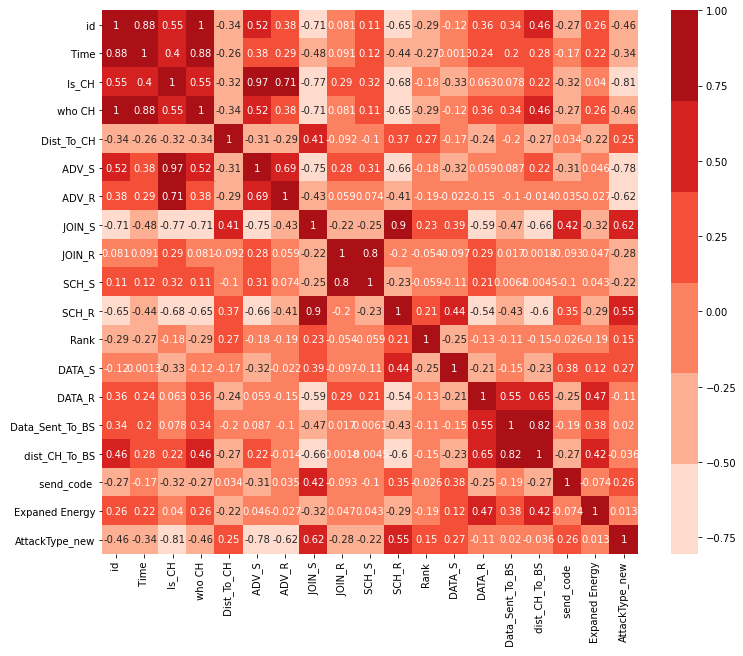

In [26]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = df_mm.corr()
colormap = sns.color_palette("Reds")
sns.heatmap(cor, annot=True, cmap=colormap)
plt.show()

In [27]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [28]:
corr_features = correlation(df_mm.loc[:, df_mm.columns[~df_mm.columns.isin(['AttackType_new',' id'])]] , 0.4)
len(set(corr_features))

13

In [29]:
corr_features

{' ADV_R',
 ' ADV_S',
 ' DATA_R',
 ' DATA_S',
 ' Data_Sent_To_BS',
 ' Is_CH',
 ' JOIN_S',
 ' SCH_R',
 ' SCH_S',
 ' dist_CH_To_BS',
 ' send_code ',
 ' who CH',
 'Expaned Energy'}

3. Mutual Information

In [30]:
X=df_mm.iloc[:,[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]]
Y=df['AttackType_new']
mi_score = MIC(X,Y)
print(mi_score)

[0.06088673 0.15906898 0.09549886 0.12146515 0.15990011 0.12516401
 0.1787966  0.02351417 0.02338212 0.16112893 0.1227128  0.13057859
 0.01437911 0.0265718  0.0140174  0.12353011 0.14651682]


In [31]:
mi=pd.DataFrame(list(zip(df_mm.loc[:,df_mm.columns != ' id'].columns,mi_score)),columns=["column","miscore"])
mi=mi.sort_values(by="miscore",ascending=False)
mi

,column,miscore
6,JOIN_S,0.178797
9,SCH_R,0.161129
4,ADV_S,0.159900
1,Is_CH,0.159069
16,Expaned Energy,0.146517
11,DATA_S,0.130579
5,ADV_R,0.125164
15,send_code,0.123530
10,Rank,0.122713
3,Dist_To_CH,0.121465


In [32]:
igr,corr_features,mi

(              Column   GainRatio
 3         Dist_To_CH  685.253938
 16    Expaned Energy  138.325389
 2             who CH   38.163639
 0               Time   15.805782
 11            DATA_S    1.839806
 10              Rank    1.256107
 7             JOIN_R    1.196996
 4              ADV_S    0.831467
 1              Is_CH    0.823206
 8              SCH_S    0.787065
 14     dist_CH_To_BS    0.588922
 12            DATA_R    0.522795
 6             JOIN_S    0.440623
 5              ADV_R    0.435440
 15        send_code     0.388453
 9              SCH_R    0.334780
 13   Data_Sent_To_BS    0.191666,
 {' ADV_R',
  ' ADV_S',
  ' DATA_R',
  ' DATA_S',
  ' Data_Sent_To_BS',
  ' Is_CH',
  ' JOIN_S',
  ' SCH_R',
  ' SCH_S',
  ' dist_CH_To_BS',
  ' send_code ',
  ' who CH',
  'Expaned Energy'},
               column   miscore
 6             JOIN_S  0.178797
 9              SCH_R  0.161129
 4              ADV_S  0.159900
 1              Is_CH  0.159069
 16    Expaned Energy  0.146517
 11

In [33]:
# After examining all the values and techniques, Pearson Correlation has the best values and features for futher steps

In [34]:
dff=df_mm.loc[:, [' Is_CH',' who CH',' ADV_S',' ADV_R',' JOIN_S',' SCH_S',' SCH_R',' DATA_S',' DATA_R',' Data_Sent_To_BS',' dist_CH_To_BS',' send_code ','Expaned Energy']]
dff['AttackType']=df['AttackType_new']
dff

,Is_CH,who CH,ADV_S,ADV_R,JOIN_S,SCH_S,SCH_R,DATA_S,DATA_R,Data_Sent_To_BS,dist_CH_To_BS,send_code,Expaned Energy,AttackType
1,0.0,0.000062,0.0,0.153846,1.0,0.0,1.0,0.219653,0.000000,0.000000,0.000000,0.444444,0.038953,3
2,0.0,0.000014,0.0,0.153846,1.0,0.0,1.0,0.236994,0.000000,0.000000,0.000000,0.333333,0.038623,3
3,0.0,0.000062,0.0,0.153846,1.0,0.0,1.0,0.219653,0.000000,0.000000,0.000000,0.444444,0.037363,3
4,0.0,0.000014,0.0,0.153846,1.0,0.0,1.0,0.236994,0.000000,0.000000,0.000000,0.333333,0.036585,3
5,0.0,0.000014,0.0,0.153846,1.0,0.0,1.0,0.236994,0.000000,0.000000,0.000000,0.333333,0.037609,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
374647,0.0,0.141876,0.0,0.192308,1.0,0.0,1.0,0.225434,0.000000,0.425926,0.824502,0.222222,0.039076,3
374651,0.0,0.141876,0.0,0.192308,1.0,0.0,1.0,0.225434,0.000000,0.425926,0.652433,0.222222,0.039535,3
374653,0.0,0.141959,0.0,0.192308,1.0,0.0,1.0,0.317919,0.000000,0.592593,0.988157,0.111111,0.053063,3
374657,0.0,0.141876,0.0,0.192308,1.0,0.0,1.0,0.225434,0.000000,0.444444,0.651017,0.222222,0.038505,3


# DATA BALANCING

In [35]:
dff.groupby('AttackType').size()

AttackType
0      5612
1        53
2      5791
3    262602
4       730
dtype: int64

C:\Users\M HARSHITHA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='AttackType', ylabel='count'>

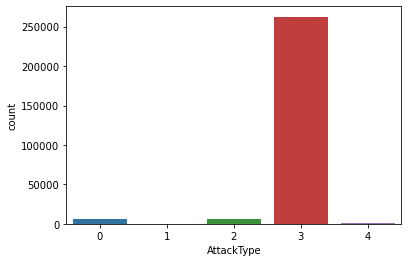

In [36]:
sns.countplot(dff['AttackType'])

In [37]:
from sklearn.model_selection import train_test_split
X = dff.iloc[:, :-1]
y = dff.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (219830, 13)
Number transactions y_train dataset:  (219830,)
Number transactions X_test dataset:  (54958, 13)
Number transactions y_test dataset:  (54958,)


In [38]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.astype('int'))

In [39]:
os = pd.concat([pd.DataFrame(X_train_res),pd.DataFrame(y_train_res)], axis=1)
os['AttackType'].value_counts()

0    210145
1    210145
2    210145
3    210145
4    210145
Name: AttackType, dtype: int64

C:\Users\M HARSHITHA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='AttackType', ylabel='count'>

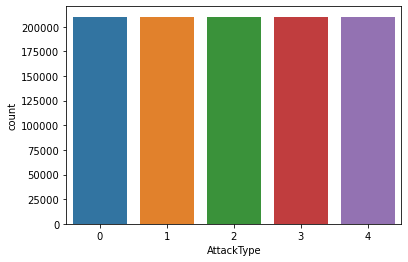

In [40]:
sns.countplot(os['AttackType'])

In [41]:
os

,Is_CH,who CH,ADV_S,ADV_R,JOIN_S,SCH_S,SCH_R,DATA_S,DATA_R,Data_Sent_To_BS,dist_CH_To_BS,send_code,Expaned Energy,AttackType
0,0.0,0.286591,0.000000,0.076923,1.0,0.0,1.0,0.138728,0.0,0.0,0.0,0.111111,0.025146,3
1,0.0,0.425613,0.000000,0.269231,1.0,0.0,1.0,0.462428,0.0,0.0,0.0,0.666667,0.075717,3
2,0.0,0.011431,0.000000,0.269231,1.0,0.0,1.0,0.236994,0.0,0.0,0.0,0.222222,0.079592,3
3,0.0,0.021377,0.000000,0.230769,1.0,0.0,1.0,0.167630,0.0,0.0,0.0,0.444444,0.029815,3
4,0.0,0.008597,0.000000,0.192308,1.0,0.0,1.0,0.306358,0.0,0.0,0.0,0.444444,0.050555,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1050720,0.0,0.008573,0.000000,0.115385,1.0,0.0,1.0,0.173410,0.0,0.0,0.0,0.333333,0.030806,4
1050721,0.0,0.021463,0.000000,0.086096,1.0,0.0,1.0,0.229835,0.0,0.0,0.0,0.222222,0.039478,4
1050722,1.0,0.569746,0.166667,0.269231,0.0,1.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.003642,4
1050723,0.0,0.003475,0.000000,0.152191,1.0,0.0,1.0,0.230965,0.0,0.0,0.0,0.222222,0.039527,4


# SUBSET SELECTION

In [42]:
new_df=os.groupby('AttackType', as_index=False).apply(lambda x: x.sample(50000)).reset_index(drop=True)
new_df

,Is_CH,who CH,ADV_S,ADV_R,JOIN_S,SCH_S,SCH_R,DATA_S,DATA_R,Data_Sent_To_BS,dist_CH_To_BS,send_code,Expaned Energy,AttackType
0,1.0,0.712098,0.166667,1.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.002514,0
1,1.0,0.710679,0.166667,1.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.002598,0
2,1.0,0.429778,0.166667,0.382269,0.0,0.5,0.0,0.000000,0.782151,0.0,0.0,0.000000,0.812715,0
3,1.0,0.428450,0.166667,0.961538,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.002517,0
4,1.0,0.851085,0.166667,1.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.002514,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,1.0,0.576621,0.166667,0.346154,0.0,1.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.003554,4
249996,1.0,0.429510,0.166667,0.723688,0.0,0.5,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.095334,4
249997,1.0,0.289936,0.166667,0.230769,0.0,1.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.003522,4
249998,0.0,0.008910,0.000000,0.115385,1.0,0.0,1.0,0.139146,0.000000,0.0,0.0,0.222222,0.025776,4


In [43]:
new_x_train=new_df.iloc[:, :-1]
new_y_train=new_df.iloc[:, -1]

# HYBRID MODEL

1. SUPPORT VECTOR MACHINE 

In [44]:
classifier=SVC(kernel='linear',random_state=1)
# The RBF kernel nonlinearly maps samples into a higher dimensional space, so it, unlike the linear kernel,
# can handle the case when the relation between class labels and attributes is nonlinear.

In [45]:
classifier.fit(new_x_train,new_y_train)

SVC(kernel='linear', random_state=1)

In [46]:
y_pred=classifier.predict(X_test)
y_pred

array([3, 3, 3, ..., 3, 3, 3])

In [47]:
accuracy_score(y_pred,y_test)

0.9759816587212052

In [48]:

from sklearn.metrics import confusion_matrix

In [49]:
c_mat=confusion_matrix(y_test,y_pred)
c_mat

array([[ 1127,     0,     0,     0,     2],
       [    1,     9,     0,     1,     0],
       [  772,     0,   428,     3,     7],
       [    0,    40,    21, 51992,   404],
       [    0,     0,     0,    69,    82]], dtype=int64)

In [50]:
y_test=pd.DataFrame(y_test,columns=['AttackType'])

2. k NEAREST NEIGHBOURS

In [51]:
knn5 = KNeighborsClassifier(n_neighbors = 5)
knn1 = KNeighborsClassifier(n_neighbors=1)

In [52]:
knn5.fit(new_x_train,new_y_train)
knn1.fit(new_x_train,new_y_train)

y_pred_5 = knn5.predict(X_test)
y_pred_1 = knn1.predict(X_test)

In [59]:
print("Accuracy with k=5", accuracy_score(y_test, y_pred_5)*100)

Accuracy with k=5 97.7564685760035


In [54]:
y_pred_5

array([3, 3, 3, ..., 3, 3, 3])

3. NAIVE BAYES - GAUSSIAN

In [56]:
model = GaussianNB()
model.fit(new_x_train,new_y_train)

GaussianNB()

In [57]:
y_predgnb = model.predict(X_test)

In [58]:
print("Accuracy:",accuracy_score(y_test, y_predgnb))

Accuracy: 0.9695403762873467
